# LimpiezaEDA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Separamos es Dataset original en el csv de entrenamiento y el csv de test

In [2]:
# Leer el archivo CSV original.
df = pd.read_csv("../data/raw/coches-de-segunda-mano-sample.csv")

# Separo los registros de train.
train = df.tail(40000)
# Guardar los registros que destino para train en un nuevo csv.
train.to_csv("../data/train/coches_train.csv", index=False)
# Separo los ultimos 10000 registros para test.
test = df.tail(10000)
# Guardar los últimos registros para test en un nuevo csv.
test.to_csv("../data/test/coches_test.csv", index=False)

## Limpieza de datos.

In [3]:
# Creo el Dataframe con los datos del csv de "coches_train.csv"
df = pd.read_csv("../data/train/coches_train.csv")
df.head()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,d231f84f2fc3c62e49086c9e2cae3a09,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Ibiza,SEAT Ibiza 1.4 TDI 77kW 105CV FR 5p.,11500,10454.0,Diésel,2017.0,88981,...,5,Manual,B4B4 Blanco (sÃ³lido),39,True,Ocasion Plus,Madrid,Spain,2021-01-04 13:05:43,2021-01-15 00:00:00
1,981ae51381b78033eec9986944bcfbbf,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Mondeo,FORD Mondeo 2.0 TDCi 110kW 150CV Trend 5p.,13999,12999.0,Diésel,2016.0,88000,...,5,Manual,Blanco,10,True,Guillen Motor,Murcia,Spain,2021-01-14 19:46:01,2021-01-15 00:00:00
2,8ad6e228a4393fdf97c8f0e908730169,9881bcdd5a0ad4733037b3fb25e69c3a,AUDI,A4,AUDI,6500,NaN,Diésel,2008.0,234000,...,4,Automático,Negro,9,False,d41219060e0c16c228ed4682cade6379,Baleares,Spain,2020-12-17 09:40:59,2021-01-15 00:00:00
3,15f08e312411d276f07cc43bed78eb8f,9881bcdd5a0ad4733037b3fb25e69c3a,MASERATI,Levante,MASERATI Levante S 5p.,54000,NaN,Gasolina,2016.0,62000,...,5,Automático,Azul,8,False,651faef175451b43088ed6fab4aab961,Madrid,Spain,2020-12-30 11:30:25,2021-01-15 00:00:00
4,da10dcae415dd7f21242308483192f9b,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Exeo,SEAT Exeo 1.8 TSI 120 CV Reference 4p.,7500,NaN,Gasolina,2011.0,150000,...,4,Manual,Gris / Plata,16,True,Vehiculos Seminuevos J&J Cars S.L,Madrid,Spain,2020-12-29 16:17:40,2021-01-15 00:00:00


Las variables predictoras que quiero usar son:
- Marca del vehículo.
- Modelo del vehículo.
- Tipo de combustible.
- Año.
- Kilómetros.
- Potencia.
- Tipo de transmisión.

In [4]:
from sklearn.preprocessing import LabelEncoder

# Elimino la columna de precio financiado para evitar perdida de registros al limpiar los "Nan"
df = df.drop(columns="price_financed")
# Creo la columna antiquity para saber los años de antiguedad del coche
df["antiquity"] = 2023 - df["year"]
# Combierto la columna marca a numerica por frecuencia.
le = LabelEncoder()
df['num_make'] = le.fit_transform(df['make'])

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33029 entries, 0 to 39999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              33029 non-null  object 
 1   company          33029 non-null  object 
 2   make             33029 non-null  object 
 3   model            33029 non-null  object 
 4   version          33029 non-null  object 
 5   price            33029 non-null  int64  
 6   fuel             33029 non-null  object 
 7   year             33029 non-null  float64
 8   kms              33029 non-null  int64  
 9   power            33029 non-null  float64
 10  doors            33029 non-null  int64  
 11  shift            33029 non-null  object 
 12  color            33029 non-null  object 
 13  photos           33029 non-null  int64  
 14  is_professional  33029 non-null  bool   
 15  dealer           33029 non-null  object 
 16  province         33029 non-null  object 
 17  country          

<Axes: xlabel='price'>

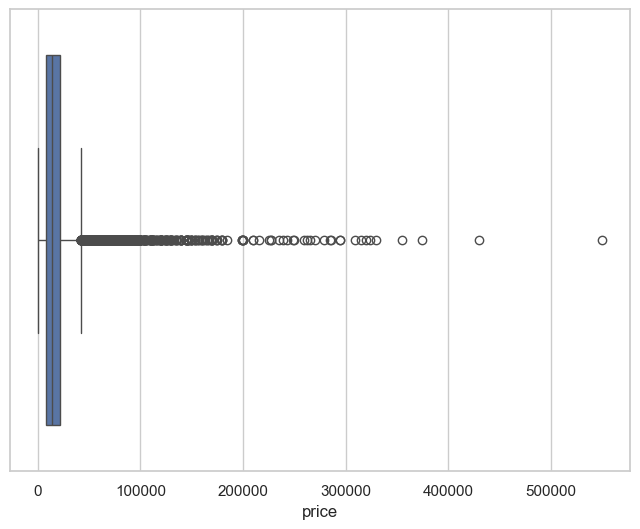

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["price"])

In [8]:
coches_lujo = df['price'] > 100000
df_lujo = df[coches_lujo]
df = df.drop(df[coches_lujo].index)

<Axes: >

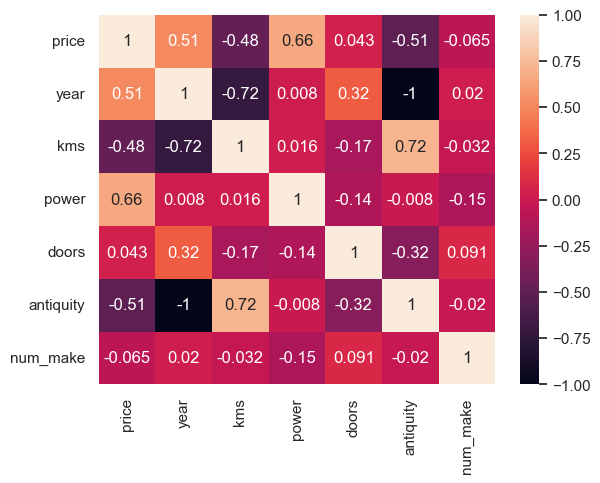

In [9]:
sns.heatmap(df[["price", "year", "kms", "power", "doors", "antiquity", "num_make"]].corr(), annot= True)

In [10]:
df.to_csv("../data/raw/coches_segunda_mano_modelos.csv", index = False)